# Multi-Type-TD-TSR Demo Notebook
## 1. Install all the prerequisite


In [1]:

import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
# !pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html

1.7.1 True


## 3. Download Table Detection Weights and Configuration File

In [3]:
# !gdown --id 11FgFTy0MyVUMGd00T_InEDaarB4qAlP8
# !gdown --id 1WBk6kHHyvyEzoPBsRr2BvFY51zURjd4R
# !gdown --id 1PfA2uws919gc893-x9uMIz06zWEko8nF 

Downloading...
From: https://drive.google.com/uc?id=11FgFTy0MyVUMGd00T_InEDaarB4qAlP8
To: /home/ishaan/Desktop/Multi-Type-TD-TSR/model_final.pth
1.10GB [03:08, 5.86MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WBk6kHHyvyEzoPBsRr2BvFY51zURjd4R
To: /home/ishaan/Desktop/Multi-Type-TD-TSR/All_X152.yaml
100%|███████████████████████████████████████████| 534/534 [00:00<00:00, 482kB/s]
Downloading...
From: https://drive.google.com/uc?id=1PfA2uws919gc893-x9uMIz06zWEko8nF
To: /home/ishaan/Desktop/Multi-Type-TD-TSR/Base-RCNN-FPN.yaml
100%|██████████████████████████████████████| 1.36k/1.36k [00:00<00:00, 1.06MB/s]


## 4. Import Everything

In [1]:
import detectron2
import scripts.deskew as deskew
import google_colab.table_detection as table_detection

from scripts.TSR import table_structure_recognition_all as tsra
from scripts.TSR import table_structure_recognition_lines as tsrl
from scripts.TSR import table_structure_recognition_lines_wol as tsrlwol
from scripts.TSR import table_structure_recognition_wol as tsrwol

from scripts.table_xml import output_to_xml
import google_colab.table_ocr as tocr
import pandas as pd
import os
import json
import itertools
import random
from detectron2.utils.logger import setup_logger
# import some common libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data import DatasetCatalog, MetadataCatalog
# from google.colab.patches import cv2_imshow
setup_logger()

<Logger detectron2 (DEBUG)>

## 5. Initialize Table Detection Detector

In [2]:
#create detectron config
cfg = get_cfg()

#set yaml
cfg.merge_from_file('All_X152.yaml')

#set model weights
cfg.MODEL.WEIGHTS = 'model_final.pth' # Set path model .pth

predictor = DefaultPredictor(cfg) 

#Table Rotation

# Table Detection

In [5]:
!wget https://www.futureretail.in/pdf/Financial_Results_Q3FY21.pdf

--2021-06-10 22:15:39--  https://www.futureretail.in/pdf/Financial_Results_Q3FY21.pdf
Resolving www.futureretail.in (www.futureretail.in)... 99.86.202.76, 99.86.202.72, 99.86.202.36, ...
Connecting to www.futureretail.in (www.futureretail.in)|99.86.202.76|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3020283 (2.9M) [application/pdf]
Saving to: ‘Financial_Results_Q3FY21.pdf’

Financial_Results_Q 100%[===================>]   2.88M  3.22MB/s    in 0.9s    

2021-06-10 22:15:40 (3.22 MB/s) - ‘Financial_Results_Q3FY21.pdf’ saved [3020283/3020283]



In [6]:
from pdf2image import convert_from_path
pages=convert_from_path("Financial_Results_Q3FY21.pdf", 500)
for i,page in enumerate(pages):
  if i == 1:
    page.save("2.jpg","jpeg")

/home/ishaan/miniconda3/envs/tdet/lib/python3.8/site-packages/detectron2/modeling/roi_heads/fast_rcnn.py:154: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370117127/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()
TABLE DETECTION:
TABLE 0 :
TABLE 1 :
TABLE 2 :


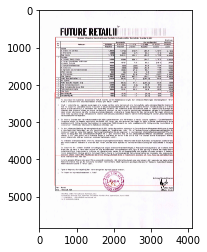

In [3]:
document_img = cv2.imread("2.jpg")
table_detection.plot_prediction(document_img, predictor)

table_list, table_coords = table_detection.make_prediction(document_img, predictor)


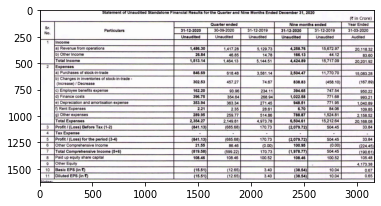

In [4]:
plt.imshow(table_list[0])

x 7 y 0 w 3159 h 109
x 0 y 0 w 2 h 106
x 7 y 112 w 128 h 395
x 0 y 112 w 2 h 395
x 142 y 113 w 1124 h 164
x 1272 y 114 w 1894 h 53
x 1272 y 171 w 627 h 51
x 1902 y 172 w 1264 h 52
x 1902 y 229 w 1264 h 50
x 1272 y 229 w 625 h 49
x 142 y 282 w 1123 h 53
x 1588 y 284 w 309 h 51
x 1269 y 284 w 316 h 51
x 2536 y 285 w 630 h 52
x 1901 y 285 w 632 h 51
x 142 y 340 w 1440 h 52
x 1589 y 342 w 943 h 51
x 2854 y 343 w 312 h 51
x 2538 y 343 w 313 h 51
x 141 y 398 w 1124 h 52
x 1589 y 399 w 943 h 52
x 1269 y 399 w 313 h 51
x 2854 y 400 w 312 h 51
x 2538 y 401 w 313 h 50
x 141 y 455 w 1124 h 52
x 1586 y 457 w 310 h 51
x 1269 y 457 w 313 h 50
x 1900 y 458 w 1266 h 51
x 6 y 511 w 129 h 564
x 0 y 511 w 2 h 564
x 140 y 513 w 1126 h 51
x 1587 y 514 w 309 h 51
x 1271 y 514 w 313 h 50
x 2854 y 515 w 312 h 51
x 1900 y 515 w 631 h 51
x 2538 y 516 w 312 h 50
x 140 y 570 w 1126 h 51
x 2854 y 571 w 312 h 52
x 1902 y 571 w 312 h 51
x 1587 y 571 w 309 h 51
x 1271 y 571 w 312 h 50
x 2538 y 572 w 312 h 51
x 2217 y

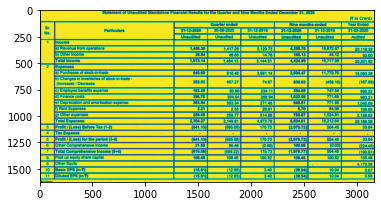

In [6]:
list_table_boxes = []

table_list = [table_list[0]]

# for table in table_list:
finalboxes, output_img = tsrl.recognize_structure(table_list[0])
list_table_boxes.append(finalboxes)